#Pytorch Computer Vision

##1. Importing base libraries

* `torchvision` - base library for PyTorch computer vision
* `torchvision.datasets`- datasets and dataloading functions
* `torchvision.models` - pretrained models
* `torchvision.transform` - functions for manipulating data
* `torch.utils.data.Dataset` - base dataset classes
* `torch.utils.data.DataLoader` - pytorch iterable over a dataset

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


##2. Getting Datasets
Getting the fashion MNIST dataset from torchvision dataset

In [ ]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape,

(torch.Size([1, 28, 28]),)

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

###2.1 Visualising the images

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

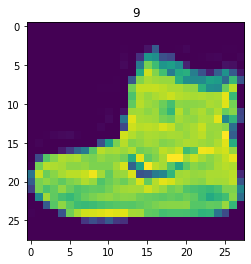

In [ ]:
image, label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

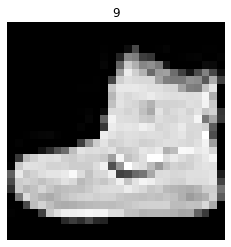

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(label)
plt.axis(False)

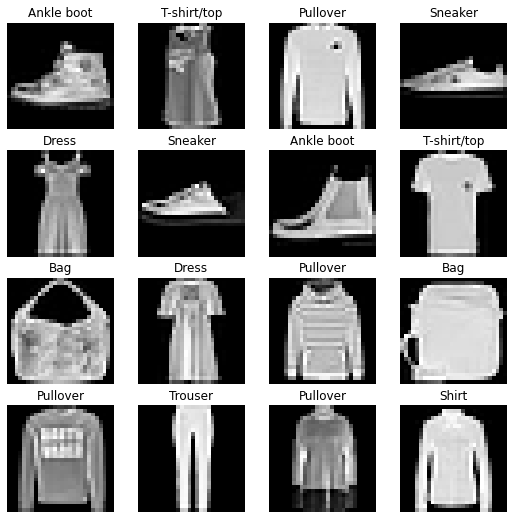

In [ ]:
#plotting random images
fig=plt.figure(figsize=(9,9))
rows, cols= 4, 4
for i in range(1, rows*cols+1):
  random_index=torch.randint(0,len(train_data),size=[1]).item()
  img, label=train_data[random_index]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


##3. Preparing a dataloader

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:

from torch.utils.data import DataLoader

BATCH_SIZE=32

#using dataloader

train_dataloader=DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_dataloader=DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fddc1edd970>,
 <torch.utils.data.dataloader.DataLoader at 0x7fddc1ec4b20>)

In [ ]:
print(f"Length : {len(train_dataloader)}, {len(test_dataloader)}")

Length : 1875, 313


In [ ]:
train_features_batch, train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

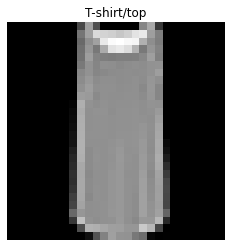

In [ ]:
#showing a sample
random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

##4. Building a baseline model

In [ ]:
class FashionMNISTModelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_0=FashionMNISTModelv0(
    input_shape=784, #28x28
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0836, -0.2786,  0.2397, -0.3104, -0.2907, -0.1834,  0.2237,  0.1931,
          0.0511, -0.0715]], grad_fn=<AddmmBackward0>)

###4.1 Setting up a loss function and optimizer

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.01)


In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

downloading


In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

###4.2 Creating a function to time the experiment

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end : float,
                     device:torch.device=None):
  total_time=end-start
  print(f"Train Time on {device} : {total_time:.3f} seconds")
  return total_time


###4.3 Running a training loop

In [ ]:
from tqdm.auto import tqdm

train_time_start_on_cpu=timer()
epochs=5

for epoch in tqdm(range(epochs)):
  print(f"epoch : {epoch}\n-----")

  train_loss=0
  #looping through the train dataloader
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #getting predictions
    y_pred=model_0(X)

    loss=loss_fn(y_pred,y)
    train_loss+= loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples")

  #dividing train_loss by length of dataset
  train_loss/= len(train_dataloader)

  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred, y_test)

      test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    #dividing total by the length of no of batches
    test_acc/=len(test_dataloader)
    test_loss/=len(test_dataloader)

  print(f"\n Training Loss : {train_loss:.4f} | Test_loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f} ")

  train_time_end=timer()
  total_train_time=print_train_time(start=train_time_start_on_cpu,
                                    end=train_time_end,
                                    device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

epoch : 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Training Loss : 0.5607 | Test_loss : 0.5145 | Test Accuracy : 81.7792 
Train Time on cpu : 13.994 seconds
epoch : 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Training Loss : 0.4992 | Test_loss : 0.5976 | Test Accuracy : 78.9537 
Train Time on cpu : 22.255 seconds
epoch : 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Training Loss : 0.4840 | Test_loss : 0.5292 | Test Accuracy : 81.3498 
Train Time on cpu : 30.720 seconds
epoch : 3
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Training Loss : 0.4779 | T

 ## 5. Making prediction

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc=0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                    y_pred=y_pred.argmax(dim=1))
    acc/=len(data_loader)
    loss/=len(data_loader)

    return {'model_name': model.__class__.__name__,
            'model_loss':loss.item(),
            'acc':acc}

In [ ]:
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.5657392144203186,
 'acc': 81.13019169329074}

##6. Setting up on GPU

In [ ]:
!nvidia-smi

Fri Feb 10 04:37:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
#Setting up device agnostic code

device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

###6.1 Creating a model

In [ ]:
class FashionMNISTModelv1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_1=FashionMNISTModelv1(input_shape=784,
                            hidden_units=10,
                            output_shape=1).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

###6.2 Loss function, optimizer and metric

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01,
                          momentum=0.9)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
from timeit import default_timer as timer
train_start_time_gpu=timer()

epochs=5

for epoch in tqdm(range(epoch)):
  print(f" Epoch : {epoch} \n...")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_end_time_gpu=timer()
total_train_time_gpu=print_train_time(start=train_start_time_gpu,
                                      end=train_end_time_gpu,
                                      device=device)

0it [00:00, ?it/s]

Train Time on cuda : 0.028 seconds


##Model 2 : Building a ConvNet


 ### Creating a model

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units : int , output_shape : int):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x

In [ ]:
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#dummy forward pass
rand_image_tensor=torch.rand(size=[1,28,28])
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 2.5285e-02,  1.3808e-02, -4.4323e-02, -8.0598e-02,  4.5562e-02,
         -8.6976e-05, -6.0024e-02, -6.2673e-02, -2.6145e-02, -1.9591e-02]],
       grad_fn=<AddmmBackward0>)

### Training the model

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01,
                          momentum=0.9)

In [ ]:
from timeit import default_timer as timer
train_time_start=timer()

epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            )
train_time_end=timer()
total_train_time_model_2=print_train_time(start=train_time_start,
                                          end=train_time_end,
                                          device='cpu')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 
----


RuntimeError: ignored